In [255]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandasql import sqldf




In [256]:
df = pd.read_csv('data/weightlifting_workouts.csv')
df.head()


,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Distance,Seconds,Notes,Workout Notes
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8,0.0,0,NaN,NaN
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8,0.0,0,NaN,NaN
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5,0.0,0,NaN,NaN
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7,0.0,0,NaN,NaN
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8,0.0,0,NaN,NaN


In [257]:
df = df.drop(['Distance','Seconds', 'Notes', 'Workout Notes'], axis = 1)
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8


In [258]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %H:%M:%S')

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9932 non-null   datetime64[ns]
 1   Workout Name   9932 non-null   object        
 2   Exercise Name  9932 non-null   object        
 3   Set Order      9932 non-null   int64         
 4   Weight         9932 non-null   float64       
 5   Reps           9932 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 465.7+ KB


In [260]:
df['Weekday'] = df['Date'].apply(datetime.datetime.weekday)
df['Weekday'] = df['Weekday'].astype('str')
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Weekday
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8,4
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8,4
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5,4
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7,4
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8,4


In [261]:
weekday_dict = {'0':'Monday', '1': 'Tuesday', '2':'Wednesday', '3':'Thursday', '4':'Friday', '5':'Saturday', '6':'Sunday'}
df['Weekday'] = df['Weekday'].replace(weekday_dict)

In [262]:
df['Time'] = df['Date'].apply(datetime.datetime.time)

In [263]:
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Weekday,Time
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8,Friday,17:06:37
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8,Friday,17:06:37
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5,Friday,17:06:37
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7,Friday,17:06:37
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8,Friday,17:06:37


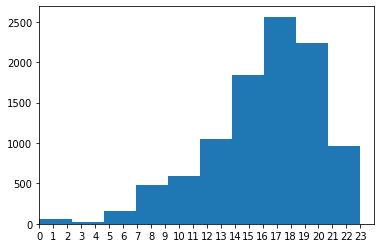

In [264]:
def chart(occurance_list):
    hour_list = [t.hour for t in occurance_list]
    numbers=[x for x in range(0,24)]
    labels=map(lambda x: str(x), numbers)
    plt.xticks(numbers, labels)
    plt.xlim(0,24)
    plt.hist(hour_list)
    plt.show()
    
chart(df.Time)

In [265]:
df['Time_Period'] = df['Date'].apply(lambda x: 'morning' if x.hour < 11 else ('afternoon' if x.hour < 17 else 'night'))

In [266]:
df['Date'][1].hour

17

In [267]:
df.dtypes

Date             datetime64[ns]
Workout Name             object
Exercise Name            object
Set Order                 int64
Weight                  float64
Reps                      int64
Weekday                  object
Time                     object
Time_Period              object
dtype: object

In [268]:
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Weekday,Time,Time_Period
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8,Friday,17:06:37,night
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8,Friday,17:06:37,night
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5,Friday,17:06:37,night
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7,Friday,17:06:37,night
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8,Friday,17:06:37,night


In [269]:
# look into clustering workouts into categories and find the strength improvement for each exercise over time
# how does the time of day effect the effort put into the workouts (more energy before work = better workout?)
# are earlier sets able to drive a higher RPE
# which exercises does this individual push themselves the hardest on and improve on the most over the time
# what rep range is the best for strength improvement
# group the workouts by workout name or exercise

In [270]:
# lets focus mainly on the strength progression of the compound movements (deadlift, squats, chinups, incline bench, shoulder press, dips)
df['Exercise Name'].value_counts().head(20)

Squat (Barbell)                     1437
Chin Up                             1217
Incline Bench Press (Barbell)        779
Seated Shoulder  Press (Barbell)     660
Weighted dips                        627
Hammer seated row (CLOSE GRIP)       347
Bench Press (Barbell)                320
Leg press (hinge )                   289
Rear delt fly                        285
Squat                                265
Bicep Curl (Barbell)                 247
Seated Cable Row (close Grip)        227
Incline Bench Press                  198
Romanian Deadlift (Barbell)          190
Lateral Raise (Dumbbells)            186
T-bar Row                            161
Deadlift (Barbell)                   156
Incline Press (Dumbbell)             152
Leg outward fly                      137
Bent Over Row (Dumbbell)             135
Name: Exercise Name, dtype: int64

In [271]:
df['Workout Name'].value_counts().head(20)

Back                                      2034
Squat 1                                   1435
Chest                                     1219
Shoulder Day                               890
1 - Heavy Squats                           452
2 - Back Heavy Chins                       379
2 - Shoulders                              313
Legs - Heavy                               294
Push - Shoulders / Bench                   289
Back - Light Chins, 8-10 Reps              280
1 Incline Day                              272
Legs - 5x5 / Volume                        268
Push - Incline                             253
Back - Pyramid.  5max, Decrease 5 Sets     244
Pulls                                      113
Back Heavier Chins                          62
2 Legs-high Reps                            51
Back - Chins.  5x6                          41
1 Heavy   Rows                              30
Legs - Heavy #34                            28
Name: Workout Name, dtype: int64

In [272]:
def consolidate_workout_name(name):
    if any(ele in name for ele in ['Back', 'Pull', 'Rows']):
        return 'Pull'
    elif any(ele in name for ele in ['Legs', 'Squat']):
        return 'Legs'
    elif any(ele in name for ele in ['Chest', 'Shoulder', 'Push', 'Bench', 'Press', 'Incline']):
        return 'Push'
    else:
        return 'None of the above'
    
df['Workout Name']= df['Workout Name'].apply(consolidate_workout_name)
    

In [273]:
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Weekday,Time,Time_Period
0,2015-10-23 17:06:37,Push,Incline Bench Press (Barbell),1,135.0,8,Friday,17:06:37,night
1,2015-10-23 17:06:37,Push,Incline Bench Press (Barbell),2,135.0,8,Friday,17:06:37,night
2,2015-10-23 17:06:37,Push,Incline Bench Press (Barbell),3,135.0,5,Friday,17:06:37,night
3,2015-10-23 17:06:37,Push,Incline Bench Press (Barbell),4,185.0,7,Friday,17:06:37,night
4,2015-10-23 17:06:37,Push,Incline Bench Press (Barbell),5,230.0,8,Friday,17:06:37,night


In [274]:
df = df.rename(columns = {'Workout Name':'Workout_Name', 'Exercise Name': 'Exercise_Name', 'Set Order': 'Set_Order'})

In [279]:
time_of_day_workouts = sqldf("select Workout_Name, count(case when Time_Period = 'night' then 1 else NULL end) as night_workouts, count(case when Time_Period = 'afternoon' then 1 else NULL end) as afternoon_workouts, count(case when Time_Period = 'morning' then 1 else NULL end) as morning_workouts from df group by 1")
time_of_day_workouts

,Workout_Name,night_workouts,afternoon_workouts,morning_workouts
0,Legs,1784,814,228
1,Pull,2122,1150,292
2,Push,1847,1305,390


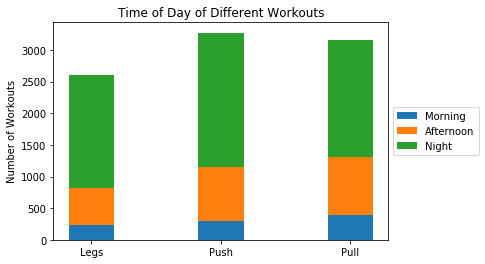

In [291]:
labels = ['Legs', 'Push', 'Pull']
night_workouts = time_of_day_workouts.night_workouts
afternoon_workouts = time_of_day_workouts.afternoon_workouts
morning_workouts = time_of_day_workouts.morning_workouts
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, morning_workouts, width, label='Morning')
ax.bar(labels, afternoon_workouts, width, bottom=morning_workouts,
       label='Afternoon')
ax.bar(labels, night_workouts, width, bottom = afternoon_workouts, label = 'Night')

ax.set_ylabel('Number of Workouts')
ax.set_title('Time of Day of Different Workouts')
ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [292]:
time_of_day_workouts['pct_morning'] = time_of_day_workouts['morning_workouts']/(time_of_day_workouts['morning_workouts']+time_of_day_workouts['afternoon_workouts']+ time_of_day_workouts['night_workouts'])
time_of_day_workouts['pct_afternoon'] = time_of_day_workouts['afternoon_workouts']/(time_of_day_workouts['morning_workouts']+time_of_day_workouts['afternoon_workouts']+ time_of_day_workouts['night_workouts'])
time_of_day_workouts['pct_night'] = time_of_day_workouts['night_workouts']/(time_of_day_workouts['morning_workouts']+time_of_day_workouts['afternoon_workouts']+ time_of_day_workouts['night_workouts'])


In [293]:
time_of_day_workouts

,Workout_Name,night_workouts,afternoon_workouts,morning_workouts,pct_morning,pct_afternoon,pct_night
0,Legs,1784,814,228,0.080679,0.288040,0.631281
1,Pull,2122,1150,292,0.081930,0.322671,0.595398
2,Push,1847,1305,390,0.110107,0.368436,0.521457


It looks like a higher percentage of the leg workouts were done at night instead of in the morning or in the afternoon compared to push and pull workouts. I can say that from my training, I would also try to avoid hitting legs in the morning because it can be very taxing and is difficult to initiate if you are tired.

## Tracking Strength

I will be using the Brzycki Formula to calculate the 1 rep max of each exercise performed based on the weight lifted and the number of reps. The formula is:

1 rep max weight = weight lifted / (1.0278 - 0.0278 * repititions)

In [294]:
df['Strength_Baseline'] = df['Weight'] / (1.0278 - 0.0278 * df['Reps'])
df.head()

,Date,Workout_Name,Exercise_Name,Set_Order,Weight,Reps,Weekday,Time,Time_Period,Strength_Baseline
0,2015-10-23 17:06:37,Push,Incline Bench Press (Barbell),1,135.0,8,Friday,17:06:37,night,167.618575
1,2015-10-23 17:06:37,Push,Incline Bench Press (Barbell),2,135.0,8,Friday,17:06:37,night,167.618575
2,2015-10-23 17:06:37,Push,Incline Bench Press (Barbell),3,135.0,5,Friday,17:06:37,night,151.890189
3,2015-10-23 17:06:37,Push,Incline Bench Press (Barbell),4,185.0,7,Friday,17:06:37,night,222.035526
4,2015-10-23 17:06:37,Push,Incline Bench Press (Barbell),5,230.0,8,Friday,17:06:37,night,285.572386


In [297]:
day_of_week_workouts = sqldf("select Workout_Name, count(case when Weekday = 'Monday' then 1 else NULL end) as mon_workouts, count(case when Weekday = 'Tuesday' then 1 else NULL end) as tues_workouts, count(case when Weekday = 'Wednesday' then 1 else NULL end) as wed_workouts, count(case when Weekday = 'Thursday' then 1 else NULL end) as thurs_workouts, count(case when Weekday = 'Friday' then 1 else NULL end) as fri_workouts, count(case when Weekday = 'Saturday' then 1 else NULL end) as sat_workouts, count(case when Weekday = 'Sunday' then 1 else NULL end) as sun_workouts from df group by 1")
day_of_week_workouts

,Workout_Name,mon_workouts,tues_workouts,wed_workouts,thurs_workouts,fri_workouts,sat_workouts,sun_workouts
0,Legs,330,307,480,301,411,409,588
1,Pull,501,575,352,588,457,630,461
2,Push,337,463,537,488,535,416,766


In [298]:
sqldf("select sum(mon_workouts), sum(tues_workouts), sum(wed_workouts), sum(thurs_workouts), sum(fri_workouts), sum(sat_workouts), sum(sun_workouts) from day_of_week_workouts")

,sum(mon_workouts),sum(tues_workouts),sum(wed_workouts),sum(thurs_workouts),sum(fri_workouts),sum(sat_workouts),sum(sun_workouts)
0,1168,1345,1369,1377,1403,1455,1815


Sunday has the most workouts out of all of the weekdays

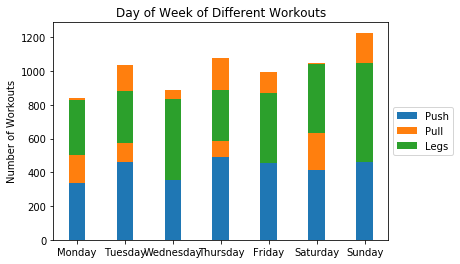

In [305]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
push_workouts = day_of_week_workouts.iloc[2, 1:].values
pull_workouts = day_of_week_workouts.iloc[1, 1:].values
legs_workouts = day_of_week_workouts.iloc[0, 1:].values
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, push_workouts, width, label='Push')
ax.bar(labels, pull_workouts, width, bottom=push_workouts,
       label='Pull')
ax.bar(labels, legs_workouts, width, bottom = pull_workouts, label = 'Legs')


ax.set_ylabel('Number of Workouts')
ax.set_title('Day of Week of Different Workouts')
ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [308]:
legs_workouts

array([330, 307, 480, 301, 411, 409, 588], dtype=object)